In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv("/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/baseline/raw_data.csv",
                 low_memory=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   startTime      50000 non-null  int64 
 1   endTime        50000 non-null  int64 
 2   sampleLabel    50000 non-null  object
 3   responseTime   50000 non-null  int64 
 4   isSuccsessful  50000 non-null  int64 
 5   isFailed       50000 non-null  int64 
 6   responseCode   50000 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 2.7+ MB


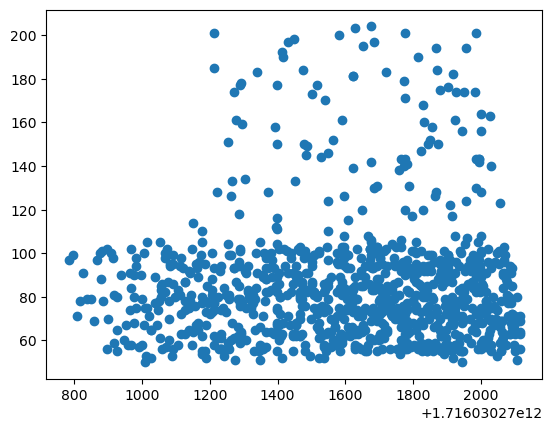

In [6]:
# Отображаем в графика первые 1000
fig, ax = plt.subplots()
ax.scatter(df["startTime"][:1000], df["responseTime"][:1000])

<Axes: ylabel='Frequency'>

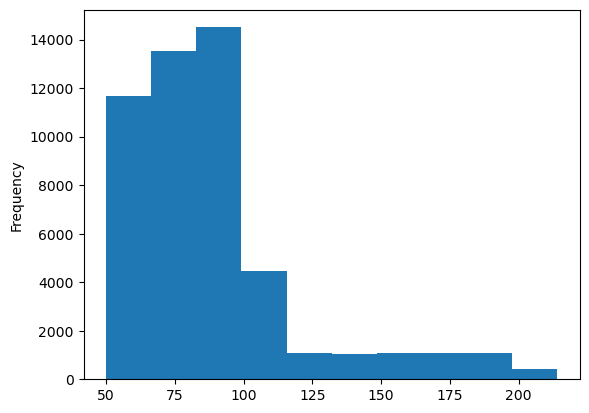

In [9]:
# Гистограмма - распределение времени отклика
df.responseTime.plot.hist()

In [17]:
# Функция для парсинга дат с точностью до миллисекунд
def custom_date_parser(x):
    return pd.to_datetime(x, unit='ms')

# Чтение CSV файла с указанием формата даты
df = pd.read_csv("/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/baseline/raw_data.csv",
                 low_memory=False,
                 parse_dates=["startTime"],
                 date_parser=custom_date_parser)

/var/folders/38/_rx6rl813f70rlbmhn_dp4z00000gn/T/ipykernel_71171/19002832.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv("/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/data/baseline/raw_data.csv",
/var/folders/38/_rx6rl813f70rlbmhn_dp4z00000gn/T/ipykernel_71171/19002832.py:3: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  return pd.to_datetime(x, unit='ms')


In [18]:
df

,startTime,endTime,sampleLabel,responseTime,isSuccsessful,isFailed,responseCode
0,2024-05-18 11:04:30.808,1716030270879,GET_mainPage,71,1,0,200
1,2024-05-18 11:04:30.784,1716030270881,GET_mainPage,97,1,0,200
2,2024-05-18 11:04:30.797,1716030270896,GET_mainPage,99,1,0,200
3,2024-05-18 11:04:30.818,1716030270896,GET_mainPage,78,1,0,200
4,2024-05-18 11:04:30.826,1716030270917,GET_mainPage,91,1,0,200
...,...,...,...,...,...,...,...
49995,2024-05-18 11:05:16.686,1716030316784,POST_card,98,1,0,200
49996,2024-05-18 11:05:16.715,1716030316793,POST_confirm,78,1,0,200
49997,2024-05-18 11:05:16.771,1716030316872,POST_card,101,1,0,200
49998,2024-05-18 11:05:16.784,1716030316881,POST_confirm,97,1,0,200


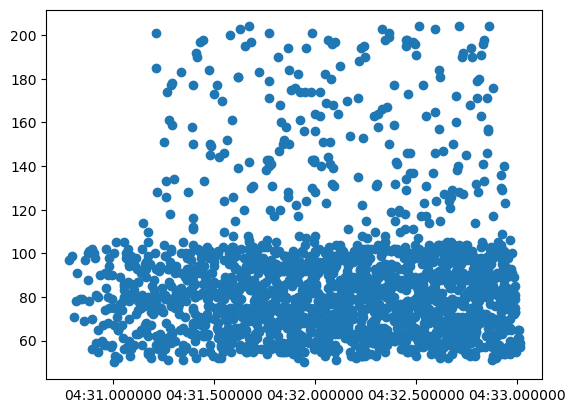

In [20]:
# Отображаем в графика первые 1000
fig, ax = plt.subplots()
ax.scatter(df["startTime"][:2000], df["responseTime"][:2000])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   startTime      50000 non-null  datetime64[ns]
 1   endTime        50000 non-null  int64         
 2   sampleLabel    50000 non-null  object        
 3   responseTime   50000 non-null  int64         
 4   isSuccsessful  50000 non-null  int64         
 5   isFailed       50000 non-null  int64         
 6   responseCode   50000 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.7+ MB


In [23]:
# Сортировать по времени это хорошая практика
df.sort_values(by=["startTime"], inplace=True, ascending=True)
df.startTime.head(20)

1    2024-05-18 11:04:30.784
2    2024-05-18 11:04:30.797
0    2024-05-18 11:04:30.808
3    2024-05-18 11:04:30.818
4    2024-05-18 11:04:30.826
5    2024-05-18 11:04:30.838
6    2024-05-18 11:04:30.848
7    2024-05-18 11:04:30.858
10   2024-05-18 11:04:30.866
14   2024-05-18 11:04:30.877
11   2024-05-18 11:04:30.880
16   2024-05-18 11:04:30.881
9    2024-05-18 11:04:30.885
8    2024-05-18 11:04:30.897
19   2024-05-18 11:04:30.897
12   2024-05-18 11:04:30.898
21   2024-05-18 11:04:30.907
23   2024-05-18 11:04:30.915
13   2024-05-18 11:04:30.918
18   2024-05-18 11:04:30.918
Name: startTime, dtype: datetime64[ns]

In [25]:
# Делаем копию датафрейма, чтобы при случае вернуться
df_tmp = df.copy()

In [26]:
# Удаляем столбец 
df_tmp.drop("startTime", axis=1, inplace=True)

In [27]:
df_tmp.sampleLabel.value_counts()

sampleLabel
GET_mainPage    10000
GET_category    10000
GET_card        10000
POST_card       10000
POST_confirm    10000
Name: count, dtype: int64

In [28]:
df_tmp.head().T

,1,2,0,3,4
endTime,1716030270881,1716030270896,1716030270879,1716030270896,1716030270917
sampleLabel,GET_mainPage,GET_mainPage,GET_mainPage,GET_mainPage,GET_mainPage
responseTime,97,99,71,78,91
isSuccsessful,1,1,1,1,1
isFailed,0,0,0,0,0
responseCode,200,200,200,200,200


In [29]:
# Создание нового DataFrame, содержащего только строки, где sampleLabel = "POST_confirm"
df_filtered = df_tmp[df_tmp['sampleLabel'] == "POST_confirm"]

In [30]:
df_filtered

,endTime,sampleLabel,responseTime,isSuccsessful,isFailed,responseCode
67,1716030271147,POST_confirm,56,1,0,200
93,1716030271207,POST_confirm,94,1,0,200
86,1716030271190,POST_confirm,63,1,0,200
90,1716030271205,POST_confirm,65,1,0,200
100,1716030271213,POST_confirm,64,1,0,200
...,...,...,...,...,...,...
49988,1716030316623,POST_confirm,133,1,0,200
49992,1716030316688,POST_confirm,180,1,0,200
49996,1716030316793,POST_confirm,78,1,0,200
49998,1716030316881,POST_confirm,97,1,0,200


# Modelling

In [31]:
# Let's build a machine learning model 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

model.fit(df_filtered.drop("SalePrice", axis=1), df_tmp["SalePrice"])

ValueError: could not convert string to float: 'POST_confirm'

# Нужно не забывать, что все модели работают с Category data!!

In [54]:
# Find the columns which contain strings
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

sampleLabel


In [55]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

In [56]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 1 to 49999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   endTime        50000 non-null  int64   
 1   sampleLabel    50000 non-null  category
 2   responseTime   50000 non-null  int64   
 3   isSuccsessful  50000 non-null  int64   
 4   isFailed       50000 non-null  int64   
 5   responseCode   50000 non-null  int64   
dtypes: category(1), int64(5)
memory usage: 2.3 MB


In [59]:
df_tmp.sampleLabel.cat.codes

1        2
2        2
0        2
3        2
4        2
        ..
49995    3
49996    4
49997    3
49998    4
49999    4
Length: 50000, dtype: int8

# Пропущенные значения заполняем mean() но это редкость для наших измерений

In [60]:
# Turn categorical variables into numbers and fill missing
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [62]:
df_tmp.head().T

,1,2,0,3,4
endTime,1716030270881,1716030270896,1716030270879,1716030270896,1716030270917
sampleLabel,3,3,3,3,3
responseTime,97,99,71,78,91
isSuccsessful,1,1,1,1,1
isFailed,0,0,0,0,0
responseCode,200,200,200,200,200
sampleLabel_is_missing,False,False,False,False,False


In [82]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model
model.fit(df_tmp.drop("responseTime", axis=1), df_tmp["responseTime"])


CPU times: user 344 ms, sys: 20.8 ms, total: 365 ms
Wall time: 130 ms


RandomForestRegressor(n_jobs=-1, random_state=42)

In [74]:
%%time
from sklearn.linear_model import LinearRegression
# Instantiate model
model2 = LinearRegression(n_jobs=-1)

# Fit the model
model2.fit(df_tmp.drop("responseTime", axis=1), df_tmp["responseTime"])

CPU times: user 23.9 ms, sys: 3.61 ms, total: 27.5 ms
Wall time: 26.4 ms


LinearRegression(n_jobs=-1)

In [80]:
%%time
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_jobs=-1)
# Fit the model
model3.fit(df_tmp.drop("responseTime", axis=1), df_tmp["responseTime"])

CPU times: user 21 ms, sys: 3.52 ms, total: 24.5 ms
Wall time: 22.4 ms


KNeighborsRegressor(n_jobs=-1)

In [77]:
# Score the model
model.score(df_tmp.drop("responseTime", axis=1), df_tmp["responseTime"])

0.4179361993696802

In [78]:
model2.score(df_tmp.drop("responseTime", axis=1), df_tmp["responseTime"])

0.208618360444083

In [81]:
model3.score(df_tmp.drop("responseTime", axis=1), df_tmp["responseTime"])

0.3220749437807431

# Надо разделить на train, validation set'ы

In [66]:
# Split data into training and validation
df_val = df_tmp[:1000]
df_train = df_tmp[1000:2000]

len(df_val), len(df_train)

(1000, 1000)

In [67]:
# Split data into X & y
X_train, y_train = df_train.drop("responseTime", axis=1), df_train.responseTime
X_valid, y_valid = df_val.drop("responseTime", axis=1), df_val.responseTime

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1000, 6), (1000,), (1000, 6), (1000,))

In [70]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [87]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [101]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [800]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
CPU times: user 10.5 s, sys: 2.31 s, total: 12.8 s
Wall time: 17.4 s


/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/predictions/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
120 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/predictions/env/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/predictions/env/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimato

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [800],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

## Hyperparameter tuning with RandomizedSearchCV - наша выручалочка

In [102]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 800,
 'max_features': 'sqrt',
 'max_depth': 3}

In [104]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 17.80555769030776,
 'Valid MAE': 16.452900606638714,
 'Training RMSLE': 0.24342290993427104,
 'Valid RMSLE': 0.22688762167026197,
 'Training R^2': 0.3954077590174665,
 'Valid R^2': 0.4687279528675241}

## Train a model with the best hyperparamters

In [106]:
%%time
# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=8,
                                    max_features='sqrt',
                                    n_jobs=-1,
                                    max_samples=800,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 76.1 ms, sys: 13 ms, total: 89.1 ms
Wall time: 80.9 ms


RandomForestRegressor(max_features='sqrt', max_samples=800, min_samples_split=8,
                      n_estimators=90, n_jobs=-1, random_state=42)

In [107]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 17.80576948237492,
 'Valid MAE': 16.454620542259505,
 'Training RMSLE': 0.24342393230648013,
 'Valid RMSLE': 0.2268821456750956,
 'Training R^2': 0.3954044282163286,
 'Valid R^2': 0.46874753995875873}

In [115]:
df_test = df_tmp

# # Drop the responseTime column
df_test = df_test.drop(columns=['responseTime'])

In [116]:
# Make predictions on the test data df_tmp2
test_preds = ideal_model.predict(df_test)

In [117]:
# Format predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["sampleLabel"] = df_test["sampleLabel"]
df_preds["responseTime"] = test_preds
df_preds

,sampleLabel,responseTime
1,3,79.774023
2,3,79.774023
0,3,79.774023
3,3,79.774023
4,3,79.774023
...,...,...
49995,4,78.696661
49996,5,127.497381
49997,4,78.696661
49998,5,127.497381


In [119]:
# Export prediction data
df_preds.to_csv("/Users/evgenii/Documents/GitHub/perfconf/perfcong-jmeter-examples/predictions/test_predictions.csv", index=False)

In [120]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0., 1., 0., 0., 0., 0.])

In [121]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()


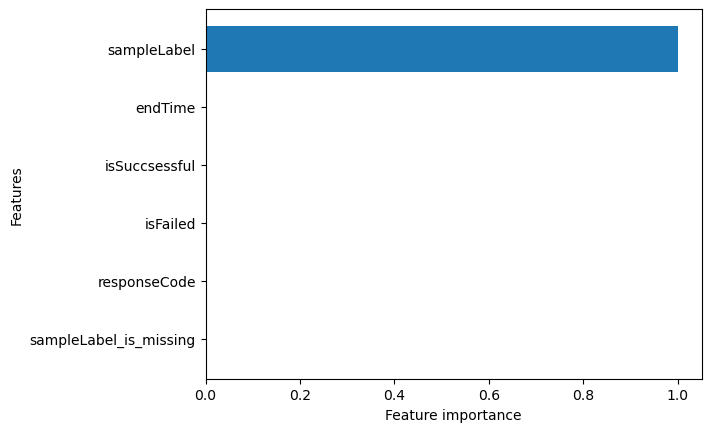

In [122]:
plot_features(X_train.columns, ideal_model.feature_importances_)
